# ISE 529 - Homework 1

Name: Zenas Huang

USC ID: 8806-6035-51

Section: Wednesdays, 5-7:50pm

Professor Acosta-Mejia, Fall 2019 Term

## Question 1

The file vitoria2006 has information about apartments in Vitoria, Spain.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import datetime
from datetime import datetime, date

In [3]:
#set formatting
# pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 12)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 120)

In [4]:
df = pd.read_csv("vitoria2006.csv")

### Question 1, (a)
How many one garage apartments have totalprice greater than 400,000 euros?

In [5]:
df[(df.totalprice>400000)&(df.garage == 1)].count()

totalprice        6
area              6
zone              6
category          6
age               6
                 ..
garage            6
elevator          6
streetcategory    6
heating           6
storage           6
Length: 15, dtype: int64

**Answer:** there are 6 one garage apartments with totalprice greater than 400,000 euros

### Question 1, (b)
Build a histogram of relative frequencies of totalprice. 
Add a normal density fo the plot. Find ethe probability that the totalprice of an apartment exceeds 300000 euros if it is assumed to be nromally distributed.
(Hint you may want to use the library import scipy.stats)


In [6]:
import scipy
import scipy.stats as stats
import seaborn as sns
from scipy.stats import norm
import matplotlib.mlab as mlab

In [7]:
samples = df.totalprice
res = stats.relfreq(samples, numbins=15)

In [8]:
x = res.lowerlimit + np.linspace(0, res.binsize*res.frequency.size,res.frequency.size)

***Answer***: for histogram with normal overlay part of problem. THe blue represents the true kernel density, the black line represents the assumed normal.

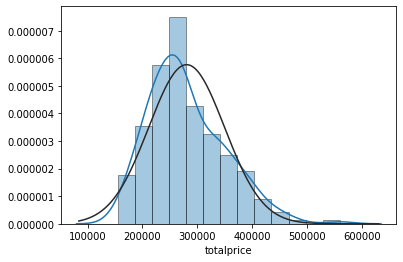

In [9]:
sns.distplot(samples, fit=norm, kde=True, hist_kws=dict(edgecolor="k"));

In [10]:
mu_totalprice = samples.mean()
sig_totalprice = samples.std()
print("the mean totalprice is ", mu_totalprice)
print("the standard deviation of totalprice is ", sig_totalprice)

the mean totalprice is  280741.5239908257
the standard deviation of totalprice is  69298.45917482488


**Answer 1**: Therefore if we assume that total price is normally distributed, then we seek P(samples > 300000),
then transforming by standard normal we get that we are seeking P(Z > (300000-280741.52)/69298) iff P(Z > 0.2779).
Thus P(samples > 300000) = 0.39358 by looking up the standard normal tables.
So there is a ~39% chance that the totalprice will be greater than 300,000 Euros.

**Answer 2:** alternately, we may use the python method norm(mu, sigma).cdf(value) from scipy stats to obtain the cumulative density to the left of the value. Then we can use 1 - to obtain the probability density to the right of value of 300,000 euros by complementation and obtain the same answer of 39%

In [11]:

Prob_greater_than300K = 1-stats.norm(mu_totalprice, sig_totalprice).cdf(300000)
print("The probability that the totalprice of an apartment exceeds 300,000 euros is ", Prob_greater_than300K *100,
      "%")

The probability that the totalprice of an apartment exceeds 300,000 euros is  39.054215697577646 %


### Question 1, (c)
Find the covariance and correlation matrix between all numerical variables.

***Answer:***

In [12]:
#correlation matrix of all numerical variables
corr = df.corr()
corr

,totalprice,area,age,floor,rooms,toilets,garage,elevator,storage
totalprice,1.000000,0.809213,-0.272450,0.029220,0.525627,0.687571,0.523742,0.510939,0.267358
area,0.809213,1.000000,-0.052262,0.081656,0.638166,0.625425,0.351541,0.394643,0.151086
age,-0.272450,-0.052262,1.000000,-0.081243,-0.082745,-0.280751,-0.214034,-0.409242,-0.266408
floor,0.029220,0.081656,-0.081243,1.000000,0.130113,0.104329,-0.030462,0.201292,-0.119861
rooms,0.525627,0.638166,-0.082745,0.130113,1.000000,0.420892,0.205930,0.352912,0.032771
toilets,0.687571,0.625425,-0.280751,0.104329,0.420892,1.000000,0.453729,0.448640,0.218621
garage,0.523742,0.351541,-0.214034,-0.030462,0.205930,0.453729,1.000000,0.271774,0.156053
elevator,0.510939,0.394643,-0.409242,0.201292,0.352912,0.448640,0.271774,1.000000,0.211845
storage,0.267358,0.151086,-0.266408,-0.119861,0.032771,0.218621,0.156053,0.211845,1.000000


In [13]:
#covariance matrix of all numerical variables
cov = df.cov()
cov

,totalprice,area,age,floor,rooms,toilets,garage,elevator,storage
totalprice,4.802276e+09,1.162639e+06,-275569.809042,4306.929479,23103.901095,23829.329737,16364.512574,14244.123620,7536.746579
area,1.162639e+06,4.298508e+02,-15.815009,3.600908,8.392216,6.484930,3.286218,3.291590,1.274237
age,-2.755698e+05,-1.581501e+01,213.031243,-2.522175,-0.766034,-2.049338,-1.408532,-2.402951,-1.581744
floor,4.306929e+03,3.600908e+00,-2.522175,4.524077,0.175538,0.110980,-0.029214,0.172240,-0.103708
rooms,2.310390e+04,8.392216e+00,-0.766034,0.175538,0.402317,0.133514,0.058893,0.090052,0.008456
toilets,2.382933e+04,6.484930e+00,-2.049338,0.110980,0.133514,0.250116,0.102313,0.090263,0.044476
garage,1.636451e+04,3.286218e+00,-1.408532,-0.029214,0.058893,0.102313,0.203293,0.049296,0.028622
elevator,1.424412e+04,3.291590e+00,-2.402951,0.172240,0.090052,0.090263,0.049296,0.161840,0.034668
storage,7.536747e+03,1.274237e+00,-1.581744,-0.103708,0.008456,0.044476,0.028622,0.034668,0.165476


### Question 1, (d)
Make a scatter plot of totalprice and area. Report the row number, totalprice, and area of the largest outlier.

***Answer***:

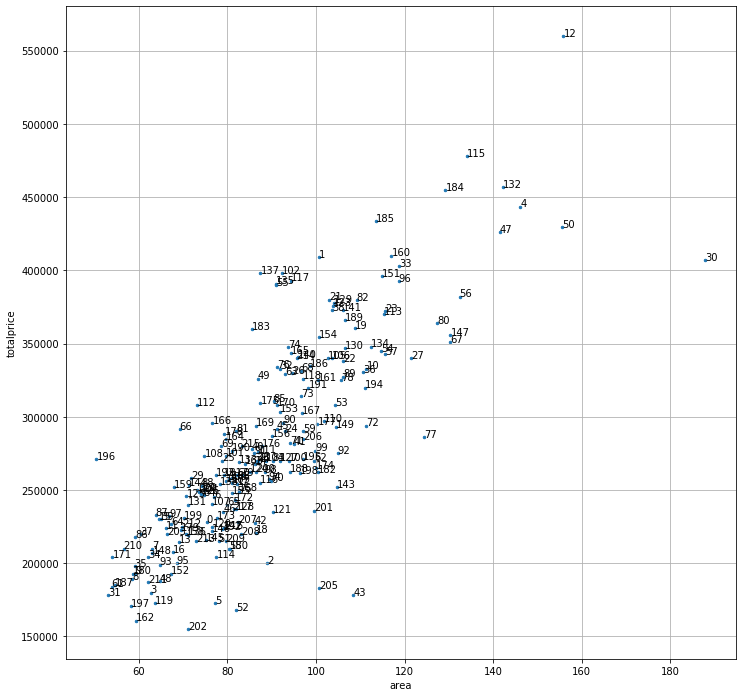

In [14]:
#create scatterplot of y = totalprice, x = area, and (x,y) points labeled by row number.
plt.figure(figsize = (12,12))
plt.ylabel('totalprice')
plt.xlabel('area')
plt.grid()
plt.scatter(df.area, df.totalprice, s = 6);
label = range(len(df))
for i, txt in enumerate(label):
    plt.annotate(txt, (df.area[i], df.totalprice[i]))

In [15]:
#From the rowlabels on the scatter graph above, we can judge heuristically that the largest outlier points
#appear to occur at row 12 and row 30

#To verify that the largest outliers occur at rows 12 and rows 30 respectively we define:
#row of the largest outlier for price
largestprice_row = df['totalprice'].idxmax()
#row of largest outlier for area
largestarea_row = df['area'].idxmax()
print("The largest price outlier occurs at row", largestprice_row)
print("The largest area outlier occurs at row", largestarea_row)

The largest price outlier occurs at row 12
The largest area outlier occurs at row 30


***Alternate answer***: Since we are asked to make the call subjectively based on what we observe from the graph, it appears that the largest outliers are at rows 12 and rows 30. However, this question can be worded more precisely. The appropriate way to consider the largest outlier and give its row number, area, and totalprice is to specify a norm (in this case the L2 Euclidean norm can be inferred from problem context) and also to specify a center to the joint distribution given by the scatter plot of totalprice and area (below we take the center as the pair (mean_x, mean_y)). Then the row with the maximum L2-distance from the center of the scatterplot will be the "largest" outlier. We use this method below to determine that the "largest" outlier occurs at row 12. We note, however, that different criteria for defining the scatterplot center and what constitutes outliers will yield different results.

In [16]:
x_center = df['area'].mean()
y_center = df['totalprice'].mean()
print("The center of the scatterplot is", x_center, y_center)

#Append new column to the dataframe that has all the L2 Distances from the center of the scatterplot
df['price_area_L2dist'] = np.sqrt((df['totalprice']-y_center)**2 + (df['area']-x_center)**2)

df[:4]

The center of the scatterplot is 88.7028438683486 280741.5239908257


,totalprice,area,zone,category,age,floor,...,garage,elevator,streetcategory,heating,storage,price_area_L2dist
0,228000.0,75.309998,Z45,4B,33,3,...,0,1,S3,3A,0,52741.525691
1,409000.0,100.650002,Z31,3B,5,7,...,1,1,S5,4A,1,128258.476566
2,200000.0,88.870003,Z52,3A,14,8,...,0,1,S2,3A,0,80741.523991
3,180000.0,62.610001,Z62,4A,41,3,...,0,0,S3,1A,0,100741.527370


In [17]:


print("The largest outlier occurs at row ", df['price_area_L2dist'].idxmax(), "with max L2 distance from center",
      df['price_area_L2dist'].max(), "and totalprice", df.at[12,'totalprice'], "Euros and area of", df.at[12, 'area'])

df.loc[[12]]

The largest outlier occurs at row  12 with max L2 distance from center 279258.484093901 and totalprice 560000.0 Euros and area of 155.8999939


,totalprice,area,zone,category,age,floor,...,garage,elevator,streetcategory,heating,storage,price_area_L2dist
12,560000.0,155.899994,Z21,2B,7,4,...,1,1,S4,3B,1,279258.484094


## Question 1, (e)

Combine the levels 2A and 2B of category to become category 2. Repeat this process with categories 3, 4, and 5.
Find the median totalprice of the apartments by category.

In [18]:
#First identify the unique keys for the category column of the dataframe
df['category'].unique()

array(['4B', '3B', '3A', '4A', '2B', '2A', '5A'], dtype=object)

In [19]:
#create multi-condition filtering function
def categorynumber(catstr):
    if catstr == '2A' or catstr == '2B':
        return 2
    elif catstr == '3A'or catstr == '3B':
        return 3
    elif catstr == '4A' or catstr == '4B':
        return 4
    elif catstr == "5A" or catstr == '5B':
        return 5

In [20]:
#create new column with numeric categories so as to preserve the original 2A, 2B, etc. data categories.
#this method appends an additional column to the dataframe called category_num as opposed to overriding
#the original data in category column and is better practice for data integrity reasons.
df['category_num'] = df['category'].apply(categorynumber)

In [21]:
#get the median for each group of apartments in vittoria grouped by category.
df.groupby(['category_num']).median()

,totalprice,area,age,floor,rooms,toilets,garage,elevator,storage,price_area_L2dist
category_num,,,,,,,,,,
2,345500.0,98.709999,9.5,4.5,5.0,2.0,1.0,1.0,1.0,64758.483002
3,279000.0,88.655003,15.0,4.0,5.0,2.0,0.0,1.0,1.0,44258.478404
4,224000.0,77.379997,24.0,4.0,5.0,1.0,0.0,1.0,1.0,57541.524831
5,183000.0,85.970001,77.0,4.0,5.0,1.0,0.0,0.0,0.0,97741.524728


***Answer***:

The median totalprice for category 2 apartments is 345,500 Euros.

The median totalprice for category 3 apartments is 279,000 Euros.

The median totalprice for category 4 apartments is 224,000 Euros.

The median totalprice for category 5 apartments is 183,000 Euros.

## Question 2

Download daily adjusted closing prices from 01-01-2015 to 06-30-2019 of the stocks reviewed in class, sans MON: (AAPL, CVX, IBM, XOM, GS, BA, TEVA, CME)

In [22]:
#we will use pandas_datareader api to download the stock data for the requested period, inclusive.
import pandas_datareader as web
import datetime

In [23]:
equities = ['AAPL', 'CVX', 'IBM', 'XOM', 'GS', 'BA','TEVA','CME']
key = 'Adj Close'
start = datetime.datetime(2014, 12, 31)
end = datetime.datetime(2019, 7,1)

In [24]:
pricesdf = web.DataReader(equities, 'yahoo', start, end)['Adj Close']
pricesdf.to_csv('prices_data')

In [25]:
#check the dataframe
pricesdf[-6:]

Symbols,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2019-06-25,194.829758,367.029724,197.653214,122.381927,194.837189,136.748734,8.81,75.333313
2019-06-26,199.043747,372.614868,191.384354,122.668976,195.781265,136.906876,8.89,75.659264
2019-06-27,198.983978,361.762573,193.248062,121.857323,198.076874,136.906876,9.08,74.888840
2019-06-28,197.170853,361.752655,193.457367,123.173790,203.323929,136.294083,9.23,75.688889
2019-07-01,200.787125,354.249481,195.929031,123.569710,205.569839,138.251038,9.32,75.619751
2019-07-02,201.962646,351.963745,199.098343,121.679153,204.695312,138.587082,9.43,74.790070


### Question 2, (a)

Find the date when AAPL stock was at the highest price.

In [26]:
pricesdf['AAPL'].idxmax()

Timestamp('2018-10-03 00:00:00')

***Answer***: The date when AAPL stock was at the highest price was 10-3-2018.

### Question 2, (b)
Plot all daily cumulative returns and find out what would be your wealth had you invested
$100 in Jan 2015 in AAPL.

In [27]:
net_returns = pricesdf/pricesdf.shift(1)-1
net_returns[:5]

Symbols,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,-0.009512,-0.000231,-0.005753,0.003566,0.002992,0.010097,-0.022431,0.004110
2015-01-05,-0.028172,-0.006926,0.005673,-0.039971,-0.031223,-0.015735,-0.020100,-0.027362
2015-01-06,0.000094,-0.011778,-0.015230,-0.000463,-0.020229,-0.021566,-0.002904,-0.005316
2015-01-07,0.014022,0.015526,0.011571,-0.000833,0.014903,-0.006535,0.041689,0.010132


In [28]:
#get daily cumulative returns
df1 = 1+net_returns.iloc[1:5,]
df1

Symbols,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2015-01-02,0.990488,0.999769,0.994247,1.003566,1.002992,1.010097,0.977569,1.004110
2015-01-05,0.971828,0.993074,1.005673,0.960029,0.968777,0.984265,0.979900,0.972638
2015-01-06,1.000094,0.988222,0.984770,0.999537,0.979771,0.978434,0.997096,0.994684
2015-01-07,1.014022,1.015526,1.011571,0.999167,1.014903,0.993465,1.041689,1.010132


In [29]:
#cumulative sums
df1.cumsum()

Symbols,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2015-01-02,0.990488,0.999769,0.994247,1.003566,1.002992,1.010097,0.977569,1.004110
2015-01-05,1.962316,1.992843,1.999920,1.963594,1.971769,1.994362,1.957469,1.976748
2015-01-06,2.962410,2.981065,2.984689,2.963131,2.951540,2.972796,2.954565,2.971432
2015-01-07,3.976432,3.996591,3.996260,3.962298,3.966443,3.966261,3.996255,3.981565


In [30]:
#cumulative products
df1.cumprod()

Symbols,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2015-01-02,0.990488,0.999769,0.994247,1.003566,1.002992,1.010097,0.977569,1.004110
2015-01-05,0.962584,0.992845,0.999887,0.963452,0.971676,0.994204,0.957920,0.976636
2015-01-06,0.962675,0.981151,0.984659,0.963006,0.952020,0.972762,0.955138,0.971444
2015-01-07,0.976173,0.996384,0.996052,0.962203,0.966207,0.966405,0.994957,0.981287


In [31]:
#all columns
gross_returns = (1+ net_returns).cumprod()
gross_returns[-5:]

Symbols,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2019-06-26,1.956713,3.264385,2.594713,1.328615,1.082780,1.046587,0.168083,0.980958
2019-06-27,1.956125,3.169310,2.619980,1.319824,1.095476,1.046587,0.171675,0.970969
2019-06-28,1.938301,3.169224,2.622818,1.334083,1.124495,1.041903,0.174511,0.981342
2019-07-01,1.973851,3.103490,2.656328,1.338371,1.136916,1.056863,0.176213,0.980445
2019-07-02,1.985407,3.083465,2.699296,1.317895,1.132079,1.059432,0.178293,0.969688


In [32]:
daily_cr = gross_returns.copy()

***Answer***: Daily Cumulative Returns Plot Portion of Answer

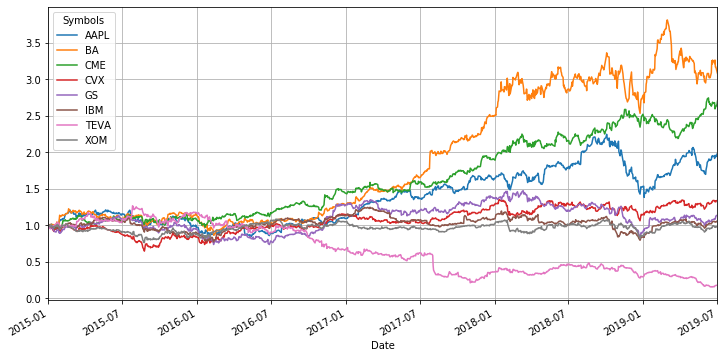

In [33]:
daily_cr.plot(figsize=(12,6))
plt.grid()

### Monthly Returns conversion
We note that since the question refers to investment in AAPL in "Jan 2015", a monthly unit, we therefore convert accordingly to monthly data first before answering the question.

In [34]:
close_px = pricesdf.copy()
close_px[:6]

Symbols,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2014-12-31,101.723541,114.145515,73.759354,92.328445,180.813599,130.812653,52.890495,77.127960
2015-01-02,100.755898,114.119171,73.334999,92.657646,181.354660,132.133499,51.704113,77.444969
2015-01-05,97.917427,113.328804,73.751030,88.954002,175.692245,130.054398,50.664879,75.325943
2015-01-06,97.926666,111.993965,72.627777,88.912827,172.138107,127.249619,50.517735,74.925484
2015-01-07,99.299805,113.732765,73.468124,88.838737,174.703430,126.417984,52.623791,75.684662
2015-01-08,103.115128,115.743813,73.809258,90.871651,177.492661,129.165680,52.973267,76.944412


In [35]:
monthly = close_px.asfreq('M').ffill()
monthly[:10]

Symbols,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2014-12-31,101.723541,114.145515,73.759354,92.328445,180.813599,130.812653,52.890495,77.127960
2015-01-31,101.723541,114.145515,73.759354,92.328445,180.813599,130.812653,52.890495,77.127960
2015-02-28,101.723541,114.145515,73.759354,92.328445,180.813599,130.812653,52.890495,77.127960
2015-03-31,115.124252,132.612045,79.210503,87.251450,175.897583,131.779541,57.640945,71.446419
2015-04-30,115.790398,126.656494,76.032372,92.304649,183.804886,140.638748,55.901543,73.438522
2015-05-31,115.790398,126.656494,76.032372,92.304649,183.804886,140.638748,55.901543,73.438522
2015-06-30,116.534195,123.359779,78.238220,80.977516,195.989777,135.600342,54.985634,70.511848
2015-07-31,112.697105,128.206314,80.743584,74.270653,192.497864,135.041840,64.215034,67.130348
2015-08-31,105.237000,116.951439,79.398445,68.840103,177.647858,124.310944,60.220871,64.362404


In [36]:
monthly_pc = monthly/monthly.shift(1)-1
monthly_pc[:5]

Symbols,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2014-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-02-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-03-31,0.131737,0.161781,0.073905,-0.054988,-0.027188,0.007391,0.089817,-0.073664
2015-04-30,0.005786,-0.044910,-0.040123,0.057915,0.044954,0.067227,-0.030177,0.027882


In [37]:
monthly_pc[:1] = 0.0
monthly_pc[:5]

Symbols,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2014-12-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-01-31,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-02-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-03-31,0.131737,0.161781,0.073905,-0.054988,-0.027188,0.007391,0.089817,-0.073664
2015-04-30,0.005786,-0.044910,-0.040123,0.057915,0.044954,0.067227,-0.030177,0.027882


In [38]:
#monthly cumulative returns
monthly_cr = (1+monthly_pc).cumprod()
monthly_cr[:5]

Symbols,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Date,,,,,,,,
2014-12-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-01-31,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-02-28,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2015-03-31,1.131737,1.161781,1.073905,0.945012,0.972812,1.007391,1.089817,0.926336
2015-04-30,1.138285,1.109606,1.030817,0.999742,1.016543,1.075116,1.056930,0.952165


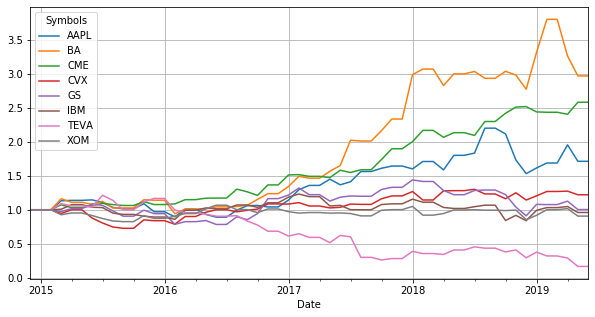

In [39]:
#plot the monthly cumulative returns
monthly_cr.plot(figsize=(10,5))
plt.grid()

In [40]:
monthly_cr['AAPL'][-5:]

Date
2019-02-28    1.689215
2019-03-31    1.689215
2019-04-30    1.957694
2019-05-31    1.714523
2019-06-30    1.714523
Freq: M, Name: AAPL, dtype: float64

***Answer***:
1.714523 is the monthly cumulative return as of the period ended 6-30-2019, so
to find how much wealth we would have if we had invested 100 dollars in apple in Jan 2015,
we take 1.7145% x $100 = $$171.45 

### Question 2,(c)
Construct a scatter_matrix plot of the net returns for the four stocks most highly correlated.

***Answer***: First we will determine our correlations based on the prices correlation matrix. Note that this will yield different resulting stock names than if one were to base the correlation ranking off of the net_returns correlation matrix.

In [41]:
pricesdf.corr()
#based on net_returns corr we would get 5 names:
#XOM, BA, GS, CME, CVX

Symbols,AAPL,BA,CME,CVX,GS,IBM,TEVA,XOM
Symbols,,,,,,,,
AAPL,1.000000,0.932156,0.906320,0.851204,0.659587,0.207673,-0.839921,0.307905
BA,0.932156,1.000000,0.965709,0.879884,0.572942,0.116305,-0.866231,0.279726
CME,0.906320,0.965709,1.000000,0.886684,0.538824,0.125083,-0.895438,0.294973
CVX,0.851204,0.879884,0.886684,1.000000,0.649256,0.401876,-0.904041,0.601656
GS,0.659587,0.572942,0.538824,0.649256,1.000000,0.611821,-0.668361,0.215615
IBM,0.207673,0.116305,0.125083,0.401876,0.611821,1.000000,-0.293235,0.483151
TEVA,-0.839921,-0.866231,-0.895438,-0.904041,-0.668361,-0.293235,1.000000,-0.365873
XOM,0.307905,0.279726,0.294973,0.601656,0.215615,0.483151,-0.365873,1.000000


This prices correlation matrix shows us that the 4 most highly correlated stock prices are AAPL, BA, CME, and CVX. So we create a scatter_matrix accordingly. Thus we have the following ***Answer*** for the scatter_matrix:

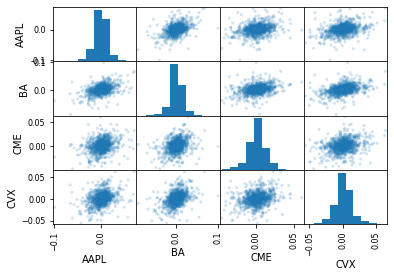

In [42]:
df2 = net_returns.copy()
df2 = df2.loc[:, 'AAPL':'CVX']
pd.plotting.scatter_matrix(df2, alpha = 0.2);

### Question 2, (d)
Construct a 4-in-1 plot that displays for the daily returns of IBM, a line plot (bottom left), a histogram (top right), a quantile-quantile plot (bottom right), and a line plot of the stock prices at the top left corner.

***Answer***:

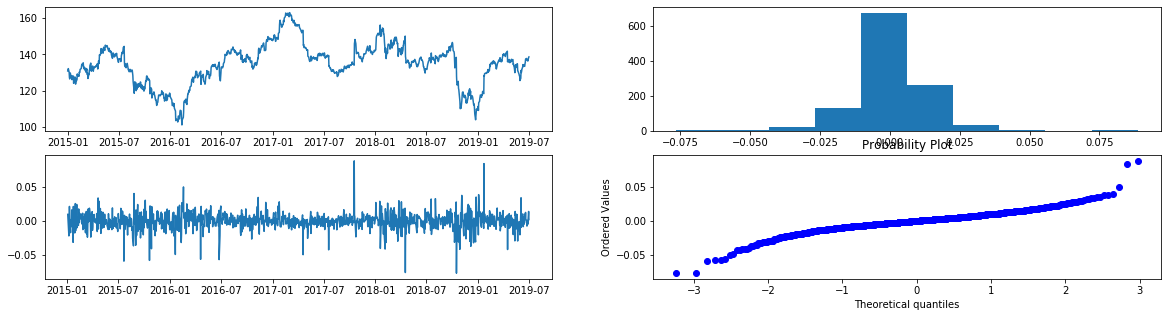

In [45]:
fig, ax = plt.subplots(2,2, figsize =(20,5))

#line plot of IBM stock price, top left
ax[0,0].plot(pricesdf['IBM'])

#ibm daily returns line plot, bottom left
ax[1,0].plot(net_returns['IBM'])

#histogram of IBM daily returns, top right
ax[0,1].hist(net_returns['IBM']) 

#quantile quantile plot of IBM daily returns, bottom right
ax[1,1] = stats.probplot(net_returns['IBM'], dist="norm", plot = plt)